In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import collections
%matplotlib inline 


def x_vert_calc(graph):
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)  # degree sequence
    k_2 = 0
    k = 0
    c = 0
    for d in degree_sequence:
        k_2 += d*d
        k += d
        c += 1
    k_2 = k_2/c
    k = k/c
    kn = k_2/k
    dif_k = kn-k
    return kn,k,dif_k

def centrality(graph,aum=400):
    degree = nx.degree_centrality(graph)
    close = nx.closeness_centrality(graph)
    between = nx.betweenness_centrality(graph)
    size_degree = []
    size_close = []
    size_between = []
    for k in degree:
        size_degree.append(pow(degree.get(k)*aum,2))
        size_close.append(pow(close.get(k)*aum,2))
        size_between.append(pow(between.get(k)*aum,2))     
    return size_degree, size_close, size_between, degree, close, between

def create_df_centrality(graph):
    dict_df = {}
    _,_,_,degree,close,between = centrality(graph)
    degree = sorted(degree.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
    close = sorted(close.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
    between = sorted(between.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)

    for nd, dd in degree[0:10]:
        cen_list = []
        cen_list.append(dd)
        for nc, dd in close:        
            if nc == nd:
                cen_list.append(dd)
        for nb, db in between:
            if nb == nd:
                cen_list.append(db)
        dict_df[nd] = cen_list

    df = pd.DataFrame.from_dict(data=dict_df,orient='index',columns=['degree_centrality','closeness_centrality','betweenness_centrality'],dtype='float')
    df.reset_index(inplace=True)
    df.rename(columns={'index':'node_id'},inplace=True)
    return df

#### 1. La paradoja de la amistad
En 1991 el sociólogo Scott L. Feld realizó un experimento en el que observó que, en promedio, la mayoría de las personas tiene menos amigos que sus amigos. Considere la siguiente formula que expresa el grado promedio de los vecinos de un nodo de grado $k$

<center>$k_{nn}(k)=\frac {<k^2>}{<k>}$</center>

Recuerde que para efectos prácticos $<k^n>=\frac {1}{N}\sum_{i=1}^{N} k_i^n$, con $N$ el número de nodos presentes en el grafo y $k_i$ el grado del nodo $i$

**a)** Muestre que la diferencia entre $k_{nn}(k)$ y $<k>$ es positiva. Para esto recuerde que la varianza se puede escribir como $Var(k)=<k^2>-<k>^2$.

$k_{nn}(k)$ $-$ $<k>$ = $\frac {<k^2>}{<k>}$ $-$ $<k>$

$\frac {<k^2>}{<k>}$ $-$ $<k>$ = $\frac {<k^2> - <k>^2}{<k>}$

$\frac {<k^2> - <k>^2}{<k>}$ = $\frac {Var(k)}{<k>}$ $>0$ 

Al ser la varianza $Var(k)$ un valor positivo, al ser dividida por otro valor positivo como $<k>$ dará un valor positivo, por lo tanto la diferencia entre $k_{nn}(k)$ y $<k>$ es positiva.

**b)** Usado lo demostrado anteriormente, fundamente la existencia de la paradoja de la amistad.

La paradoja de la amistad explica que al escoger a una persona aleatoria dentro de una red social, tendrá una menor cantidad de conexiones con amigos respecto a la cantidad de amigos promedio que tienen sus amigos. Esto ocurre principalmente por las personas que tienen muchos amigos, esto quiere decir que esos *nodos* tiene un mayor grado, por lo tanto aumentan el promedio de amigos de una persona en particular.

**c)** Usando el paquete Networkx, genere un grafo de Erdös-Rényi ($p=$0.01), de Watts-Strogatz ($p=$0.6, $k=$3) y de Barabási-Albert ($m=$3) con 100 nodos cada uno. Verifique que la paradoja se presenta en los tres casos.

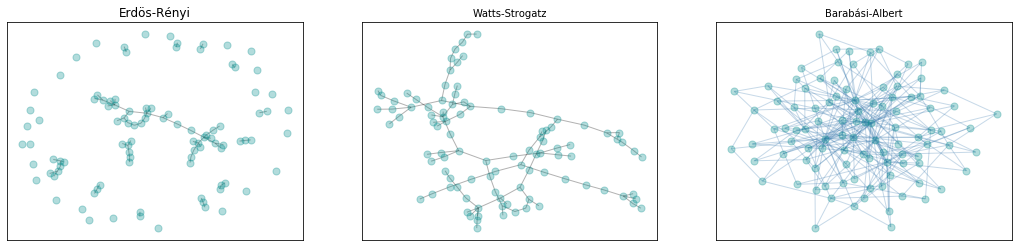

Erdös-Rényi
- Knn = 2.19
- K = 1.18
- Dif = 1.01
Watts-Strogatz
- Knn = 2.45
- K = 2.00
- Dif = 0.45
Barabási-Albert
- Knn = 10.00
- K = 5.82
- Dif = 4.18


In [2]:
nodes = 100

fig, ax = plt.subplots(1, 3,figsize=(18,4))
for i in range(3):
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)

##################
###Erdös-Rényi
##################
G_er = nx.erdos_renyi_graph(n=nodes,p=0.01)
kn, k, dif_k = x_vert_calc(G_er)
nx.draw_networkx(G_er,node_size = 50,node_color ='darkcyan', alpha = 0.3, edge_color = 'black',with_labels=False,ax=ax[0])
ax[0].set_title("Erdös-Rényi")
#plt.show()

##################
###Watts-Strogatz
##################
G_ws = nx.watts_strogatz_graph(n=nodes,p=0.6,k=3)
nx.draw_networkx(G_ws,node_size = 50,node_color ='darkcyan', alpha = 0.3, edge_color = 'black',with_labels=False,ax=ax[1])
ax[1].set_title("Watts-Strogatz", fontsize=10)
#plt.show()

##################
###Barabási-Albert
##################
G_ba = nx.barabasi_albert_graph(n=nodes,m=3)
nx.draw_networkx(G_ba,node_size = 50,node_color ='darkcyan', alpha = 0.3, edge_color = 'steelblue',with_labels=False,ax=ax[2])
ax[2].set_title("Barabási-Albert", fontsize=10)
plt.show()

kn, k, dif_k = x_vert_calc(G_er)
print('Erdös-Rényi')
print('- Knn = {:.2f}'.format(kn))
print('- K = {:.2f}'.format(k))
print('- Dif = {:.2f}'.format(dif_k))

kn, k, dif_k = x_vert_calc(G_ws)
print('Watts-Strogatz')
print('- Knn = {:.2f}'.format(kn))
print('- K = {:.2f}'.format(k))
print('- Dif = {:.2f}'.format(dif_k))

kn, k, dif_k = x_vert_calc(G_ba)
print('Barabási-Albert')
print('- Knn = {:.2f}'.format(kn))
print('- K = {:.2f}'.format(k))
print('- Dif = {:.2f}'.format(dif_k))

La paradoja se presenta en los 3 casos, en los casos que los grafos tienen una mayor cantidad de conexiones entre sus nodos, o están mas unidos, como en el caso de el grafo de **Barabási-Abert**.

**d)** Para cada grafo, dibuje una distribución de sus grados (histograma) y sobre ellos dibuje las rectas verticales $x1=\frac {<k^2>}{<k>}$ y $x2=<k>$

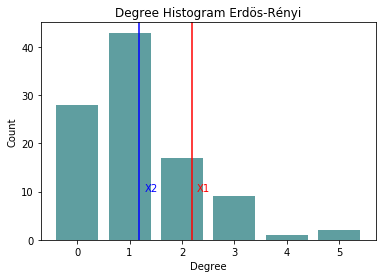

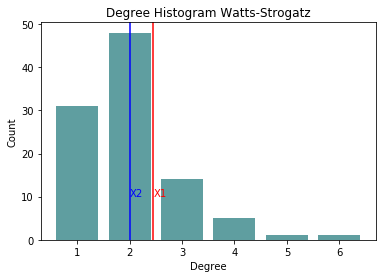

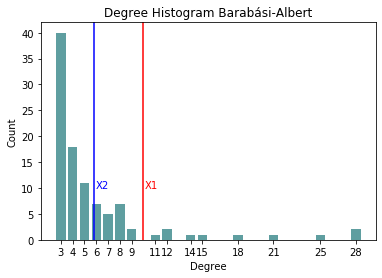

In [3]:
degree_sequence = sorted([d for n, d in G_er.degree()], reverse=True)  # degree sequence
#print(degree_sequence)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()

plt.bar(deg,cnt,width=0.8, color='cadetblue')
plt.title("Degree Histogram Erdös-Rényi")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)
x1, x2, dif_k = x_vert_calc(G_er)
#print(dif_k)
plt.axvline(x=x1, color='red')
plt.text(x1+0.1,10,'X1',color='red',rotation=0)
plt.axvline(x=x2, color='blue')
plt.text(x2+0.1,10,'X2',color='blue',rotation=0)
plt.show()

degree_sequence = sorted([d for n, d in G_ws.degree()], reverse=True)  # degree sequence
#print(degree_sequence)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg,cnt,width=0.8, color='cadetblue')
plt.title("Degree Histogram Watts-Strogatz")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)
x1, x2, dif_k = x_vert_calc(G_ws)
plt.axvline(x=x1, color='red')
plt.text(x1+0.01,10,'X1',color='red',rotation=0)
plt.axvline(x=x2, color='blue')
plt.text(x2+0.01,10,'X2',color='blue',rotation=0)
plt.show()

degree_sequence = sorted([d for n, d in G_ba.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg,cnt,width=0.8, color='cadetblue')
plt.title("Degree Histogram Barabási-Albert")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)
x1, x2, dif_k = x_vert_calc(G_ba)
plt.axvline(x=x1, color='red')
plt.text(x1+0.1,10,'X1',color='red',rotation=0)
plt.axvline(x=x2, color='blue')
plt.text(x2+0.1,10,'X2',color='blue',rotation=0)
plt.show()

#### 2. Importancia de un nodo
Genere los mismos tres grafos de la pregunta anterior, pero esta vez con 30 nodos cada uno.

**a)** Grafique tres veces, uno al lado de otro, la red de Erdös-Rényi de modo que el tamaño de los nodos sea proporcional a su *degree centrality, closeness centrality y betweenness centrality* respectivamente. Repita el mismo procedimiento para los otros dos grafos.


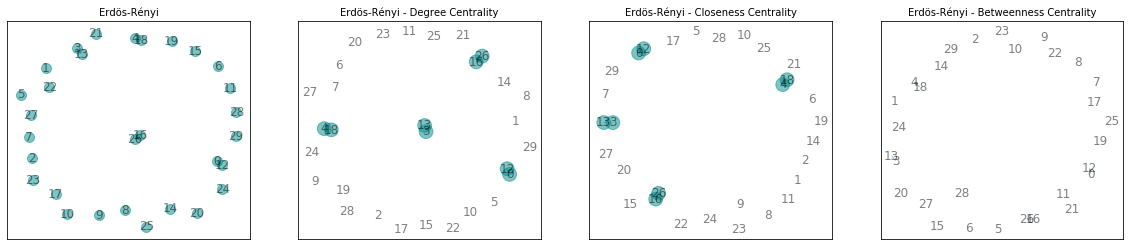

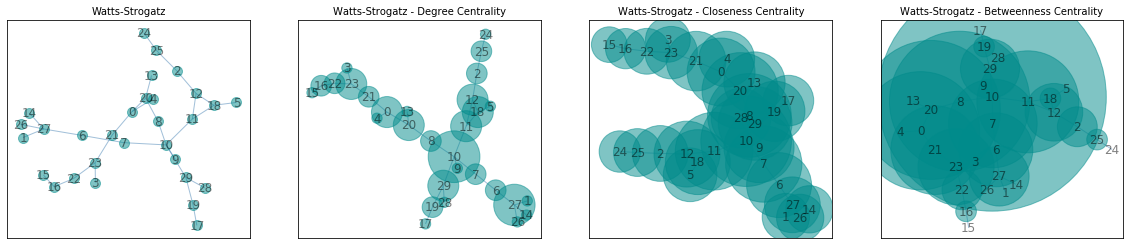

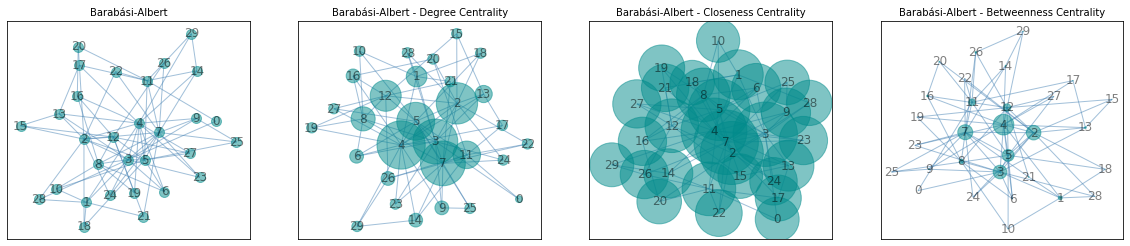

In [4]:
nodes = 30

##################
###Erdös-Rényi
##################
G_er = nx.erdos_renyi_graph(n=nodes,p=0.01)
size_degree, size_close, size_between,_,_,_ = centrality(G_er,aum=400)
fig, ax = plt.subplots(1, 4,figsize=(20,4))
for i in range(4):
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)
    
nx.draw_networkx(G_er,node_size = 100,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue',ax=ax[0])
ax[0].set_title("Erdös-Rényi", fontsize=10)
nx.draw_networkx(G_er,node_size = size_degree,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue',ax=ax[1])
ax[1].set_title("Erdös-Rényi - Degree Centrality", fontsize=10)
nx.draw_networkx(G_er,node_size = size_close,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue',ax=ax[2])
ax[2].set_title("Erdös-Rényi - Closeness Centrality", fontsize=10)
nx.draw_networkx(G_er,node_size = size_between,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue',ax=ax[3])
ax[3].set_title("Erdös-Rényi - Betweenness Centrality", fontsize=10)

##################
###Watts-Strogatz
##################
G_ws = nx.watts_strogatz_graph(n=nodes,p=0.6,k=3)
size_degree, size_close, size_between,_,_,_ = centrality(G_ws,aum=300)
fig, ax = plt.subplots(1, 4,figsize=(20,4))
for i in range(4):
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)
    
nx.draw_networkx(G_ws,node_size = 100,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue',ax=ax[0])
ax[0].set_title("Watts-Strogatz", fontsize=10)
nx.draw_networkx(G_ws,node_size = size_degree,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue',ax=ax[1])
ax[1].set_title("Watts-Strogatz - Degree Centrality", fontsize=10)
nx.draw_networkx(G_ws,node_size = size_close,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue',ax=ax[2])
ax[2].set_title("Watts-Strogatz - Closeness Centrality", fontsize=10)
nx.draw_networkx(G_ws,node_size = size_between,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue',ax=ax[3])
ax[3].set_title("Watts-Strogatz - Betweenness Centrality", fontsize=10)

##################
###Barabási-Albert
##################
G_ba = nx.barabasi_albert_graph(n=nodes,m=3)
size_degree, size_close, size_between,_,_,_ = centrality(G_ba,aum=100)
fig, ax = plt.subplots(1, 4,figsize=(20,4))
for i in range(4):
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)

nx.draw_networkx(G_ba,node_size = 100,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue',ax=ax[0])
ax[0].set_title("Barabási-Albert", fontsize=10)

nx.draw_networkx(G_ba,node_size = size_degree,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue',ax=ax[1])
ax[1].set_title("Barabási-Albert - Degree Centrality", fontsize=10)
nx.draw_networkx(G_ba,node_size = size_close,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue',ax=ax[2])
ax[2].set_title("Barabási-Albert - Closeness Centrality", fontsize=10)

nx.draw_networkx(G_ba,node_size = size_between,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue',ax=ax[3])
ax[3].set_title("Barabási-Albert - Betweenness Centrality", fontsize=10)

plt.show()

**b)** Para cada grafo, usando el paquete Pandas, cree un dataframe como se describe a continuación: en la primera columna coloque el nombre de los diez nodos con mayor *score* de *degree centrality*, en la segunda columna escriba el valor del *degree centrality* de cada nodo correspondiente a la primera columna, en la tercera columna escriba el valor del *betweenness centrality* de cada nodo. El header del dataframe debe ser en consecuencia *node_id, degree centrality, closeness centrality, betweenness centrality*.

In [5]:
df_er = create_df_centrality(G_er)
df_ws = create_df_centrality(G_ws)
df_ba = create_df_centrality(G_ba)

In [6]:
df_er

,node_id,degree_centrality,closeness_centrality,betweenness_centrality
0,26,0.034483,0.034483,0.0
1,18,0.034483,0.034483,0.0
2,16,0.034483,0.034483,0.0
3,13,0.034483,0.034483,0.0
4,12,0.034483,0.034483,0.0
5,4,0.034483,0.034483,0.0
6,3,0.034483,0.034483,0.0
7,0,0.034483,0.034483,0.0
8,29,0.000000,0.000000,0.0
9,28,0.000000,0.000000,0.0


In [7]:
df_ws

,node_id,degree_centrality,closeness_centrality,betweenness_centrality
0,10,0.172414,0.302083,0.761084
1,27,0.137931,0.185897,0.199507
2,29,0.103448,0.245763,0.197044
3,23,0.103448,0.174699,0.253695
4,20,0.103448,0.254386,0.463054
5,18,0.103448,0.216418,0.068966
6,12,0.103448,0.219697,0.192118
7,11,0.103448,0.258929,0.339901
8,0,0.103448,0.226562,0.394089
9,25,0.068966,0.159341,0.068966


In [8]:
df_ba

,node_id,degree_centrality,closeness_centrality,betweenness_centrality
0,4,0.482759,0.659091,0.206444
1,7,0.448276,0.644444,0.150268
2,3,0.448276,0.644444,0.136250
3,2,0.413793,0.630435,0.145862
4,5,0.379310,0.617021,0.118162
5,12,0.310345,0.537037,0.075686
6,11,0.275862,0.537037,0.065669
7,8,0.241379,0.537037,0.042528
8,1,0.206897,0.500000,0.038449
9,13,0.172414,0.508772,0.017413


**c)** Usando sus conocimientos y los puntos anteriores, discuta las diferencias entre los tres tipos de centralidad mencionados.

**d)** Dé al menos un ejemplo de en qué situación sería adecuado considerar la importancia de un nodo como su *score* de *degree centrality, closeness centrality, betweenness centrality*.

**[R] c) d)** 

El *degree centrality* indica el nivel de centralidad en un nodo específico, esto quiere decir que a medida que un nodo tiene mas relaciones con el resto de nodos de una red, tendrá un mayor grado de centralidad, en cambio los nodos que tienen menos relaciones tendrán un menor grado de centralidad. Por ejemplo esta medida sirve para poder indentificar personas influyentes o potenciales influyentes en una red de personas, esto se puede identificar de mejor manera en el grafo **Barabási-Albert - Degree Centrality**

En cambio el *betweenness centrality* indica el nivel de *intermediación* de un nodo específico, esto quiere decir que si un nodo está entre medio, o es un intermediario, del camino mas corto que tienen que recorrer otros dos nodos de la red, tendrá un mayor nivel de intermediación, en el caso contrario tendrá un menor nivel de intermediación.  Por ejemplo en una red de transferencia de información, los nodos con mayor nivel de *betweenness* serán aquellos nodos que puedan recibir y transmitir información en una mayor cantidad de nodos en una red, esto se puede apreciar en el grafo **Barabási-Albert - Betweenness Centrality**


La medida *closeness centrality* indica el nivel de accesibilidad que tiene un nodo en la red, esto quiere decir que a medida que el nivel de cercanía es mayor, el nodo se encuentra mas cerca a otros nodos en la red. Por ejemplo esta medida es relevante para poder encontrar los nodos con los cuales podemos transmitir información a través de una red de una forma mas rápida, para los casos de redes altamente conectadas los nodos tendrán valores similares, lo primero se puede ver en el grafo **Erdös-Rényi - Degree Centrality**, en cambio lo segundo se puede ver en el grafo **Erdös-Rényi - Closeness Centrality**.
